In [ ]:
#   This notebook deomnstrate the reading of the MO matrix and the transition density matrices from NEXMD
# ("vhf.out" and "transition-densities.out" files respectively), then it calculates the GS density, an excited 
# state density, and the transition density matrix between two excited states

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
import os
os.chdir('/Users/victormanuelfreixaslemus/Desktop/Projects/Git_portafolio/STO_Gaussian_overlaps/STO_Gaussian_overlaps')
from src.densities.get_MO_from_NEXMD import get_MO_from_NEXMD
from src.densities.get_TDM_from_NEXMD import get_TDM_from_NEXMD

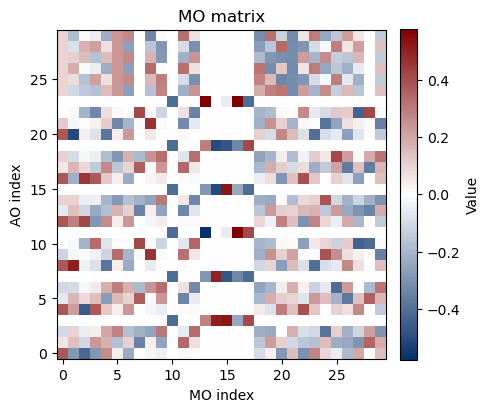

In [8]:
# This cell reads the MO matrix from the NEXMD output ("vhf.out")

debug = True

vhfFileName = "examples/Benzene_run_NEXMD_custom_vhf/vhf.out"
timeStep = 1
mo = get_MO_from_NEXMD(vhfFileName, timeStep)

# Plotting the MO matrix:
if debug:
    vmax = np.max(np.abs(mo))
    vmin = -vmax
    cmap = LinearSegmentedColormap.from_list(
        "bwr_custom",
        [
            (0.0,  "#08306b"),  # deep blue
            (0.5,  "#ffffff"),  # white at zero
            (1.0,  "#7f0000"),  # deep red
        ],
        N=256
    )
    norm = TwoSlopeNorm(vmin=vmin, vcenter=0.0, vmax=vmax)
    plt.figure(figsize=(5, 5))
    im = plt.imshow(mo, cmap=cmap, norm=norm, origin='lower', aspect='equal')
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label("Value", fontsize=10)
    plt.title("MO matrix", fontsize=12)
    plt.xlabel("MO index", fontsize=10)
    plt.ylabel("AO index", fontsize=10)
    plt.tight_layout()
    plt.show()


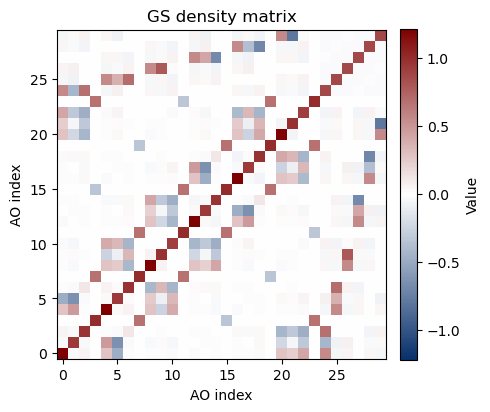

In [9]:
# Calculating and plotting the GS density in the AO basis

nOcc = 15
gsDensity = 2 * mo[:, :nOcc] @ mo[:, :nOcc].T

vmax = np.max(np.abs(gsDensity))
vmin = -vmax
cmap = LinearSegmentedColormap.from_list(
    "bwr_custom",
    [
        (0.0,  "#08306b"),  # deep blue
        (0.5,  "#ffffff"),  # white at zero
        (1.0,  "#7f0000"),  # deep red
    ],
    N=256
)
norm = TwoSlopeNorm(vmin=vmin, vcenter=0.0, vmax=vmax)
plt.figure(figsize=(5, 5))
im = plt.imshow(gsDensity, cmap=cmap, norm=norm, origin='lower', aspect='equal')
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("Value", fontsize=10)
plt.title("GS density matrix", fontsize=12)
plt.xlabel("AO index", fontsize=10)
plt.ylabel("AO index", fontsize=10)
plt.tight_layout()
plt.show()

In [10]:
# Exporting the GS density matrix

np.savetxt("examples/Densities_output/GS_density.txt", gsDensity, fmt="%.6f")